<a href="https://colab.research.google.com/github/Kishore8949/LLMsApplications/blob/main/Langchain_with_Gemini_and_Build_with_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies .

In [2]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
import google.generativeai as genai
from google.colab import userdata

In [4]:
import os
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Text generation

In [6]:
model = genai.GenerativeModel(model_name = "gemini-pro")
model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [7]:
response = model.generate_content("What are the usecases of LLMs?")

In [8]:
to_markdown(response.text)

> 1. **Content Generation**: LLMs can generate coherent and informative text, including articles, stories, poems, and scripts. They can also generate code, images, and music. This capability is useful for various applications such as creating marketing content, writing reports, composing music, and generating code snippets for programming tasks.
> 
> 2. **Language Translation**: LLMs can translate text from one language to another while preserving the meaning and context of the original text. This capability is beneficial for businesses operating globally, language learners, and individuals communicating with people from different linguistic backgrounds.
> 
> 3. **Summarization and Abstraction**: LLMs can summarize long texts, extracting the main points and generating a condensed version that conveys the essential information. Additionally, they can abstract text, identifying the key concepts and ideas while omitting unnecessary details. These capabilities are useful for tasks such as summarizing research papers, generating executive summaries, and creating abstracts for academic papers.
> 
> 4. **Chatbots and Virtual Assistants**: LLMs are employed to power chatbots and virtual assistants that can engage in natural language conversations with users. These chatbots can provide customer support, answer questions, offer product recommendations, and assist with various tasks. They help businesses improve customer engagement and streamline customer service processes.
> 
> 5. **Sentiment Analysis**: LLMs can analyze text to determine the sentiment or opinion expressed in it. They can identify whether the sentiment is positive, negative, or neutral. This capability is valuable for analyzing customer feedback, social media posts, and product reviews to gauge public sentiment towards a product or service.
> 
> 6. **Question Answering**: LLMs can answer questions posed in natural language. They access a vast knowledge base to provide informative and relevant answers to a wide range of queries. This capability is useful for creating question-answering systems, developing educational tools, and building conversational AI systems.
> 
> 7. **Code Generation**: LLMs can generate code in various programming languages. They can translate natural language instructions into syntactically correct code, making it easier for non-programmers to create simple applications and scripts. This capability has applications in software development, automation, and data analysis.
> 
> 8. **Healthcare and Medicine**: LLMs are used in the healthcare and medical fields for tasks such as analyzing medical records, identifying drug interactions, and generating patient summaries. They can also assist in developing treatment plans and providing personalized medical advice.
> 
> 9. **Finance and Economics**: LLMs are employed in the finance and economics domains for tasks such as analyzing financial data, forecasting economic trends, and generating financial reports. They can also be used to create trading strategies and make investment decisions.
> 
> 10. **Legal and Regulatory Compliance**: LLMs can analyze legal documents, identify relevant clauses and regulations, and extract key information. They can also assist in drafting legal contracts and ensuring compliance with regulatory requirements.

# Using langchain to access Gemini API

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [10]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

In [11]:
result = llm.invoke("What are the usecases of LLMs?")

In [13]:
to_markdown(result.content)

> 1. **Customer Service Chatbots:** LLMs can be used to create AI-powered chatbots that can understand and respond to customer inquiries in a natural language manner, providing quick and efficient resolution.
> 
> 2. **Content Generation:** LLMs can write compelling articles, blog posts, product descriptions, and more, which may be particularly useful for marketers, content creators, and businesses looking to create engaging content.
> 
> 3. **Language Translation:** LLMs can translate text or speech seamlessly between different languages, breaking down language barriers and facilitating communication and understanding.
> 
> 4. **Summarization and Abstraction:** LLMs can summarize complex documents, research papers, and articles, extracting the most important information and expressing it concisely, saving time and effort for users.
> 
> 5. **Code Generation:** LLMs can generate code in various programming languages, including Python, Java, and JavaScript, assisting developers in tasks such as bug fixing, refactoring, and even creating new applications.
> 
> 6. **Creative Writing:** LLMs can generate creative and engaging stories, poems, lyrics, and other forms of creative content, providing inspiration and assistance to writers and artists.
> 
> 7. **Medical Diagnosis and Research:** LLMs can analyze medical data, aiding in the diagnosis and treatment of diseases, as well as assist in medical research by identifying patterns and relationships within vast datasets.
> 
> 8. **Legal Research and Analysis:** LLMs can analyze legal documents, case studies, and regulations, helping legal professionals find relevant information and insights, and even generate contract terms.
> 
> 9. **E-commerce and Product Recommendations:** LLMs can enhance e-commerce experiences by providing personalized product recommendations based on a user's preferences, browsing history, and previous purchases.
> 
> 10. **Education and Learning:** LLMs can develop personalized lesson plans, provide explanations and examples, and even generate practice questions, aiding students in their learning and comprehension.

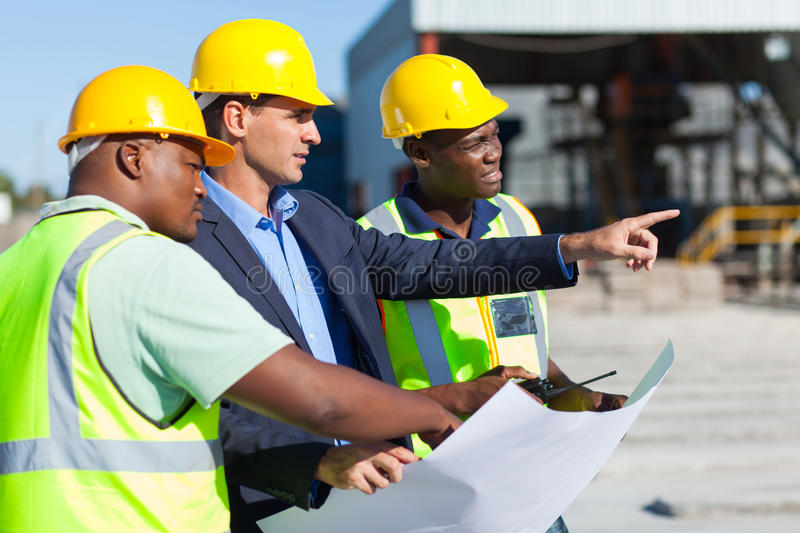

In [14]:
import PIL.Image

img = PIL.Image.open('safety_gear.jpg')
img

In [17]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",google_api_key=GOOGLE_API_KEY)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Write a short description about the product shown in the image for mentioning it on a construction website",
        },
        {"type": "image_url", "image_url": "/content/safety_gear.jpg"},
    ]
)
llm.invoke([message])

AIMessage(content=' Construction workers wearing hard hats and safety vests are looking at blueprints while discussing something.')

# Chat with Documents using RAG (Retreival Augment Generation)

In [18]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 31 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121671 files and directories

In [19]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [20]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [21]:
model = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True)

# Extract text from PDF

In [22]:
pdf_loader = PyPDFLoader("/content/attention_is_all_you_need.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)

Figure 1: The Transformer - model architecture.
The Transformer follows this overall architecture using stacked self-attention and point-wise, fully
connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,
respectively.
3.1 Encoder and Decoder Stacks
Encoder: The encoder is composed of a stack of N= 6 identical layers. Each layer has two
sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-
wise fully connected feed-forward network. We employ a residual connection [ 11] around each of
the two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is
LayerNorm( x+ Sublayer( x)), where Sublayer( x)is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding
layers, produce outputs of dimension dmodel = 512 .
Decoder: The decoder is also composed of a stack of N= 6identical layers.

In [23]:
len(pages)

16

# RAG Pipeline: Embedding + Gemini (LLM)

In [25]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [24]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [26]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [27]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})

In [28]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)

In [29]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

"The Multi-Head Attention layer is a key component of the Transformer model, allowing it to attend to different parts of the input sequence and capture long-range dependencies. Here's a detailed explanation of how it works:\n\n1. **Input:** The Multi-Head Attention layer takes three inputs:\n\n    - **Query (Q):** A matrix of shape (batch_size, query_length, d_k), where:\n        - `batch_size` is the number of sequences in the batch.\n        - `query_length` is the length of the query sequence.\n        - `d_k` is the dimension of the query and key vectors.\n    - **Key (K):** A matrix of shape (batch_size, key_length, d_k), where:\n        - `key_length` is the length of the key sequence.\n    - **Value (V):** A matrix of shape (batch_size, key_length, d_v), where:\n        - `d_v` is the dimension of the value vectors.\n\n2. **Linear Projections:** The query, key, and value matrices are first projected into multiple sets of lower-dimensional vectors using linear transformations. Th

In [30]:
Markdown(result["result"])

The Multi-Head Attention layer is a key component of the Transformer model, allowing it to attend to different parts of the input sequence and capture long-range dependencies. Here's a detailed explanation of how it works:

1. **Input:** The Multi-Head Attention layer takes three inputs:

    - **Query (Q):** A matrix of shape (batch_size, query_length, d_k), where:
        - `batch_size` is the number of sequences in the batch.
        - `query_length` is the length of the query sequence.
        - `d_k` is the dimension of the query and key vectors.
    - **Key (K):** A matrix of shape (batch_size, key_length, d_k), where:
        - `key_length` is the length of the key sequence.
    - **Value (V):** A matrix of shape (batch_size, key_length, d_v), where:
        - `d_v` is the dimension of the value vectors.

2. **Linear Projections:** The query, key, and value matrices are first projected into multiple sets of lower-dimensional vectors using linear transformations. This is done by multiplying each matrix with a weight matrix:

    - **Query Projection:** Q = Q * W_Q
    - **Key Projection:** K = K * W_K
    - **Value Projection:** V = V * W_V

    where W_Q, W_K, and W_V are weight matrices.

3. **Scaled Dot-Product Attention:** The core of the Multi-Head Attention layer is the scaled dot-product attention mechanism. For each query vector q_i in Q, it calculates a weighted sum of the value vectors v_j in V, where the weights are determined by the compatibility between q_i and the corresponding key vector k_j in K. This is done using a scaled dot-product operation:

    - **Attention Weights:** A = softmax((Q * K^T) / sqrt(d_k))
    - **Weighted Sum:** Output = A * V

    where:
        - A is the matrix of attention weights.
        - sqrt(d_k) is used for scaling to prevent large values in the dot product.

4. **Multi-Head Attention:** The Multi-Head Attention layer consists of multiple independent attention heads, each performing the above steps in parallel. The outputs of these heads are then concatenated and projected to produce the final output:

    - **Concatenation:** H = [head_1, head_2, ..., head_h]
    - **Projection:** Output = H * W_O

    where W_O is a weight matrix.

The Multi-Head Attention layer allows the model to attend to different parts of the input sequence and capture long-range dependencies by combining information from multiple attention heads. It has proven effective in various natural language processing tasks, including machine translation, text summarization, and question answering.

In [31]:
result["source_documents"]

[Document(page_content='Attention Visualizations\nInput-Input Layer5\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nIt\nis\nin\nthis\nspirit\nthat\na\nmajority\nof\nAmerican\ngovernments\nhave\npassed\nnew\nlaws\nsince\n2009\nmaking\nthe\nregistration\nor\nvoting\nprocess\nmore\ndifficult\n.\n<EOS>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\n<pad>\nFigure 3: An example of the attention mechanism following long-distance dependencies in the\nencoder self-attention in layer 5 of 6. Many of the attention heads attend to a distant dependency of\nthe verb ‘making’, completing the phrase ‘making...more difficult’. Attentions here shown only for\nthe word ‘making’. Different colors represent different heads. Best viewed in color.\n13\n\nInput-Input Layer5\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould

In [32]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [33]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]

'Multi-Head Attention consists of several attention layers running in parallel. Each attention layer is calculated using Scaled Dot-Product Attention. The Scaled Dot-Product Attention function takes three vectors as input: query, key, and value. The query vector is used to calculate a weighted sum of the value vectors, where the weights are determined by the compatibility between the query and key vectors. The compatibility is calculated using a dot product, which is then scaled by a factor of the square root of the dimension of the key vectors. This scaling factor helps to prevent the dot product from growing too large, which can lead to unstable gradients.\n\nThe output of the Scaled Dot-Product Attention function is a weighted sum of the value vectors. This weighted sum is then passed through a linear layer to produce the output of the attention layer.\n\nThe Multi-Head Attention layer consists of multiple attention layers running in parallel. Each attention layer uses a different s

In [34]:
Markdown(result["result"])

Multi-Head Attention consists of several attention layers running in parallel. Each attention layer is calculated using Scaled Dot-Product Attention. The Scaled Dot-Product Attention function takes three vectors as input: query, key, and value. The query vector is used to calculate a weighted sum of the value vectors, where the weights are determined by the compatibility between the query and key vectors. The compatibility is calculated using a dot product, which is then scaled by a factor of the square root of the dimension of the key vectors. This scaling factor helps to prevent the dot product from growing too large, which can lead to unstable gradients.

The output of the Scaled Dot-Product Attention function is a weighted sum of the value vectors. This weighted sum is then passed through a linear layer to produce the output of the attention layer.

The Multi-Head Attention layer consists of multiple attention layers running in parallel. Each attention layer uses a different set of query, key, and value vectors. The outputs of the attention layers are concatenated and passed through a linear layer to produce the output of the Multi-Head Attention layer.

Multi-Head Attention allows the model to attend to different parts of the input sequence simultaneously. This is useful for tasks such as machine translation, where the model needs to be able to attend to both the source and target sentences at the same time.

Here is a mathematical formulation of the Multi-Head Attention layer:

```
MultiHead(Q, K, V) = Concat(head_1, ..., head_h)W^O
```

where:

* Q, K, and V are the query, key, and value vectors, respectively
* head_i is the output of the i-th attention layer
* W^O is a linear layer that projects the concatenated outputs of the attention layers to the desired output dimension

The Multi-Head Attention layer is a powerful tool for modeling long-range dependencies in sequential data. It has been shown to achieve state-of-the-art results on a variety of natural language processing tasks, including machine translation, text summarization, and question answering.

In [35]:
question = "Describe Random forest?"
result = qa_chain({"query": question})
Markdown(result["result"])

I am sorry, I do not have access to the internet to get the context from the given URL and am unable to answer the question.